<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/mod2_maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assumption of MLE: The values of the attribute "CHOL" which represents cholesterol levels is normally distributed.

MLE Estimated Mean (mu): 5.368099159624255
MLE Estimated Standard Deviation (sigma): 1.131791891091536


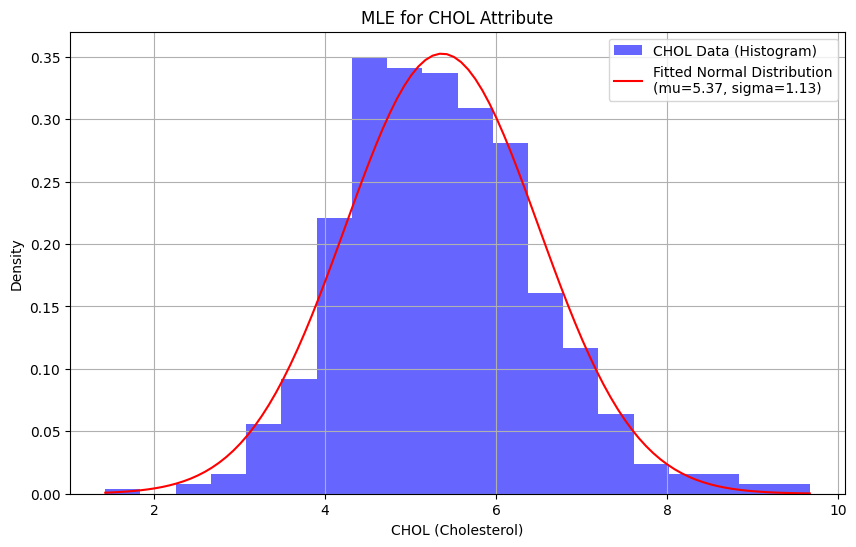

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt

file_path = "/content/HepatitisCdata.csv"
data = pd.read_csv(file_path)

chol_data = data["CHOL"].dropna()  # Remove missing values

# negative log-likelihood function for a normal distribution
def negative_log_likelihood(params, data):
    mu, sigma = params
    if sigma <= 0:  # Ensure standard deviation is positive
        return np.inf
    log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return -log_likelihood  # Negative for minimization

# Initial guesses for mean and standard deviation
initial_params = [chol_data.mean(), chol_data.std()]

# optimization to find MLE estimates
result = minimize(negative_log_likelihood, initial_params, args=(chol_data,))
mle_mu, mle_sigma = result.x

print(f"MLE Estimated Mean (mu): {mle_mu}")
print(f"MLE Estimated Standard Deviation (sigma): {mle_sigma}")

# Visualization
plt.figure(figsize=(10, 6))
# Histogram of data
plt.hist(chol_data, bins=20, density=True, alpha=0.6, color='blue', label="CHOL Data (Histogram)")

# Overlay the fitted normal distribution
x = np.linspace(chol_data.min(), chol_data.max(), 100)
y = norm.pdf(x, loc=mle_mu, scale=mle_sigma)
plt.plot(x, y, 'r-', label=f"Fitted Normal Distribution\n(mu={mle_mu:.2f}, sigma={mle_sigma:.2f})")

plt.title("MLE for CHOL Attribute")
plt.xlabel("CHOL (Cholesterol)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()
